# **PROJETO DE ENCERRAMENTO DE CURSO**

##### **ALUNA:** NAYARA BRITO ALMEIDA VALEVSKII  |  **TURMA:** 109  |  **CURSO:** DATA SCIENCE

_________________________________________________________________________________________________________________________________________________

#### O PROJETO CONSISTE EM ANALISAR DUAS BASES DE DADOS DO TWITTER, DO PRESIDENTE LUIZ INÁCIO LULA DA SILVA E DO EX-PRESIDENTE JAIR MESSIAS BOLSONARO.

**OBJETIVO:** 
- Trazer análises sobre as databases em python.

_________________________________________________________________________________________________________________________________________________

 **PRIMEIRA ETAPA - IMPORTANDO BIBLIOTECAS NECESSÁRIAS PARA AS ANÁLISES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime



_________________________________________________________________________________________________________________________________________________

**SEGUNDA ETAPA - PREPARANDO O DATAFRAME**

**LENDO OS ARQUIVOS JSON E TRANSFORMANDO EM DATAFRAME**


In [2]:
#Lendo arquivos
df_bolsonaro = pd.read_json('jairbolsonaro.json')
df_lula = pd.read_json('LulaOficial.json')


#Criando dataframe
df = [df_bolsonaro, df_lula]
nome = ['bolsonaro', 'lula']

**VERIFICANDO AS INFORMAÇÕES DO DATAFRAME**

> *HEAD* - Portanto, quando você executa df.head(), o Pandas irá exibir as cinco primeiras linhas do DataFrame por padrão, caso queira visualizar uma quantidade diferente, basta no parenteses colocar o numero referente a quantidade de linhas. Essa função permite que você visualize rapidamente os dados contidos nessas linhas. Isso é especialmente útil quando você deseja ter uma noção inicial dos tipos de dados e valores presentes em um DataFrame antes de prosseguir com a análise de dados.

In [3]:
df_bolsonaro.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN


In [4]:
df_lula.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


> *INFO* - O resultado dessa chamada é uma visão rápida e resumida do DataFrame, o que é útil para entender a estrutura dos dados, verificar a integridade dos valores e identificar possíveis problemas, como dados ausentes. Isso é especialmente importante ao lidar com análises de dados, uma vez que permite que você avalie a qualidade e o tamanho do conjunto de dados antes de realizar operações mais complexas.

In [5]:
df_bolsonaro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6794 entries, 0 to 6793
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 6794 non-null   datetime64[ns, UTC]
 1   id                         6794 non-null   int64              
 2   id_str                     6794 non-null   int64              
 3   full_text                  6794 non-null   object             
 4   truncated                  6794 non-null   bool               
 5   display_text_range         6794 non-null   object             
 6   entities                   6794 non-null   object             
 7   source                     6794 non-null   object             
 8   in_reply_to_status_id      896 non-null    float64            
 9   in_reply_to_status_id_str  896 non-null    float64            
 10  in_reply_to_user_id        938 non-null    float64            
 11  in_r

In [6]:
df_lula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 14961 non-null  datetime64[ns, UTC]
 1   id                         14961 non-null  int64              
 2   id_str                     14961 non-null  int64              
 3   full_text                  14961 non-null  object             
 4   truncated                  14961 non-null  bool               
 5   display_text_range         14961 non-null  object             
 6   entities                   14961 non-null  object             
 7   source                     14961 non-null  object             
 8   in_reply_to_status_id      321 non-null    float64            
 9   in_reply_to_status_id_str  321 non-null    float64            
 10  in_reply_to_user_id        388 non-null    float64            
 11  in

**FORMATANDO A DATA**

> *PARA UMA MELHOR ANÁLISE DA BASE DE DADOS, FAZER UM TRATAMENTO NA DATA, PARA QUE POSSA FAZER AS ANÁLISES DE FORMA CORRETA.*

In [7]:
# Organizando os dataframes por data:
df_lula = df_lula.sort_values('created_at')
df_bolsonaro = df_bolsonaro.sort_values('created_at')

In [8]:
df_bolsonaro['created_at'] = pd.to_datetime(df_bolsonaro['created_at'], format='%d/%m/%Y')
df_bolsonaro['created_at'] = pd.to_datetime(df_bolsonaro['created_at']).dt.strftime('%d/%m/%Y')
df_lula['created_at'] = pd.to_datetime(df_lula['created_at'], format='%d/%m/%Y')
df_lula['created_at'] = pd.to_datetime(df_lula['created_at']).dt.strftime('%d/%m/%Y')

# Converter a coluna 'created_at' para formato de data
date_formats = ['%d/%m/%Y', '%m/%d/%Y', '%Y-%m-%d', '%Y/%m/%d']  # Adicione outros formatos se necessário

def convert_to_date(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return None

df_lula['created_at'] = df_lula['created_at'].apply(convert_to_date)
df_bolsonaro['created_at'] = df_bolsonaro['created_at'].apply(convert_to_date)

**SELECIONANDO AS COLUNAS PARA ANÁLISES**

> *PARA UMA MELHOR ANÁLISE, FOI FEITA UMA SELEÇÃO DAS COLUNAS QUE TEM MAIS RELEVÂNCIA PARA ESSE PROJETO*.

In [9]:
# Colunas a serem mantidas nos novos DataFrames
colunas_selecionadas = ['created_at', 'full_text', 'favorite_count', 'retweet_count']

# Criar DataFrames separados para Bolsonaro e Lula
df_bolsonaro = df[0][colunas_selecionadas].copy()
df_lula = df[1][colunas_selecionadas].copy()

In [10]:
df_bolsonaro

,created_at,full_text,favorite_count,retweet_count
0,2010-04-01 02:59:50+00:00,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",15,30
1,2019-01-10 11:02:23+00:00,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",31618,1773
2,2019-07-19 02:04:16+00:00,- Para descontrair. Proibido queimar ovo. (Kkk...,46637,5859
3,2018-10-09 02:52:56+00:00,Trecho de entrevista ao vivo para o Jornal Nac...,56322,13915
4,2017-08-23 15:12:48+00:00,Querem criar o fundão bilionário na Reforma Po...,7147,2271
...,...,...,...,...
6789,2019-09-17 16:39:08+00:00,Menos burocratização e gastos ao brasileiro: a...,46305,6264
6790,2016-02-20 12:32:40+00:00,A @RevistaEpoca mente DESCARADAMENTE a meu res...,893,452
6791,2019-01-07 15:22:55+00:00,Foi realizada hoje a Cerimônia de Posse dos Pr...,42443,5082
6792,2019-10-16 11:27:36+00:00,- O Estatuto do Desarmamento ainda está em vig...,34029,5744


In [11]:
df_lula

,created_at,full_text,favorite_count,retweet_count
0,2018-08-17 16:23:04+00:00,"""O presidente Lula vai dar um passeio nessa el...",347,79
1,2014-09-16 01:53:02+00:00,@dilmabr afirma que aqueles que querem acabar ...,9,17
2,2017-08-08 23:23:49+00:00,O PT deu cidadania para as mulheres fazerem po...,203,72
3,2017-10-18 11:24:23+00:00,Continuo sendo o lulinha paz e a amor. A gente...,153,63
4,2017-04-24 22:24:18+00:00,"Olhando as últimas pesquisas, vemos que a únic...",168,63
...,...,...,...,...
14956,2014-10-23 13:51:38+00:00,O prefeito Eduardo Paes e @LindbergFarias acom...,8,19
14957,2018-10-02 13:23:07+00:00,"Haddad, o candidato de Lula, com Lindberg sena...",191,52
14958,2016-07-24 15:04:25+00:00,"Nádia Campeão: ""não vamos permitir que essa ca...",12,5
14959,2019-06-11 15:31:21+00:00,"Os advogados de Lula, Cristiano Zanin e José R...",1191,263


_________________________________________________________________________________________________________________________________________________

## **TERCEIRA ETAPA - INICIANDO AS ANÁLISES DO DATAFRAME**

> CONTAGEM TOTAL DE TWEETS: COMPARANDO O NÚMERO TOTAL DE TWEETS DE CADA POLÍTICO AO LONGO DO TEMPO.

In [12]:
# Contagem total de tweets ao longo do tempo
df_lula['created_at'] = pd.to_datetime(df_lula['created_at'])
df_bolsonaro['created_at'] = pd.to_datetime(df_bolsonaro['created_at'])

lula_tweet_count = df_lula['created_at'].dt.to_period('M').value_counts().sort_index()
bolsonaro_tweet_count = df_bolsonaro['created_at'].dt.to_period('M').value_counts().sort_index()

# Média de retweets e favoritos
lula_avg_retweets = df_lula['retweet_count'].mean()
lula_avg_favorites = df_lula['favorite_count'].mean()

bolsonaro_avg_retweets = df_bolsonaro['retweet_count'].mean()
bolsonaro_avg_favorites = df_bolsonaro['favorite_count'].mean()

# Impressão dos resultados
print("Contagem total de tweets:")
print("Lula:", lula_tweet_count)
print("Bolsonaro:", bolsonaro_tweet_count)

print("\nMédia de Retweets e Favoritos:")
print("Lula - Média de Retweets:", lula_avg_retweets)
print("Lula - Média de Favoritos:", lula_avg_favorites)
print("Bolsonaro - Média de Retweets:", bolsonaro_avg_retweets)
print("Bolsonaro - Média de Favoritos:", bolsonaro_avg_favorites)

Contagem total de tweets:
Lula: created_at
2014-09     752
2014-10     706
2014-11       4
2014-12      53
2015-02      66
2016-06       5
2016-07     209
2016-08     564
2016-09     603
2016-10     189
2016-11     374
2016-12     130
2017-01     142
2017-02      42
2017-03     271
2017-04     382
2017-05     170
2017-06     303
2017-07     383
2017-08    1476
2017-09     461
2017-10    1049
2017-11     145
2017-12     487
2018-01     232
2018-02     152
2018-03     609
2018-04     283
2018-05     132
2018-06     252
2018-07     484
2018-08     987
2018-09     773
2018-10     620
2018-11     106
2018-12      80
2019-01      49
2019-02      73
2019-03      54
2019-04     177
2019-05      89
2019-06     159
2019-07      83
2019-08     112
2019-09     124
2019-10      90
2019-11     182
2019-12      73
2020-01      20
Freq: M, Name: count, dtype: int64
Bolsonaro: created_at
2010-04     30
2010-05      6
2010-06      3
2010-07      8
2011-01      1
          ... 
2019-09    177
2019-10    

C:\Users\Nayar\AppData\Local\Temp\ipykernel_6312\3520017353.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\Nayar\AppData\Local\Temp\ipykernel_6312\3520017353.py:6: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



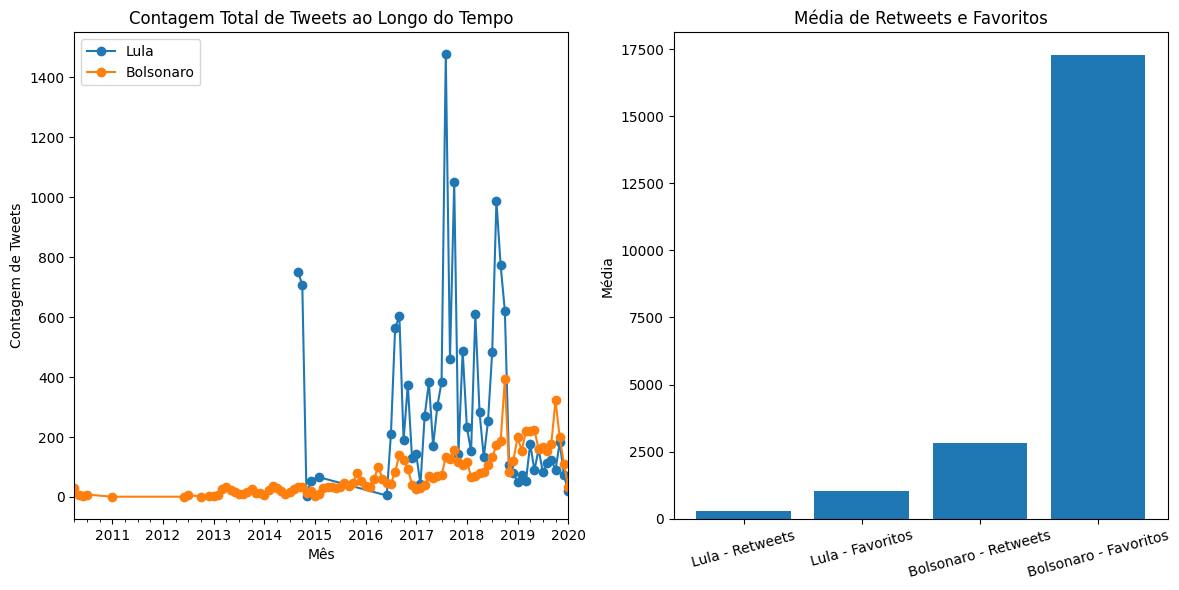

In [13]:
# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
lula_tweet_count.plot(kind='line', label='Lula', marker='o')
bolsonaro_tweet_count.plot(kind='line', label='Bolsonaro', marker='o')
plt.title('Contagem Total de Tweets ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Contagem de Tweets')
plt.legend()

plt.subplot(1, 2, 2)
labels = ['Lula - Retweets', 'Lula - Favoritos', 'Bolsonaro - Retweets', 'Bolsonaro - Favoritos']
values = [lula_avg_retweets, lula_avg_favorites, bolsonaro_avg_retweets, bolsonaro_avg_favorites]
plt.bar(labels, values)
plt.title('Média de Retweets e Favoritos')
plt.ylabel('Média')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

> FAZENDO UMA ANÁLISE PARA IDENTIFICAR QUEM TEM MAIS ENGAJAMENTO.

Vamos filtrar pela data a partir de 01/01/2015, já que na base de dados do Lula têm poucas informações de 2014, e iremos colocar como data de corte 31/12/2019, já que a nossa base de dados só vai até janeiro de 2020.

**GRÁFICO DE LINHAS**

Está sendo usado para mostrar a evolução do engajamento ao longo do tempo, identificando tendências e variações.

In [26]:
# Calcular engajamento (retweets + favoritos)
df_lula['engagemento'] = df_lula['retweet_count'] + df_lula['favorite_count']
df_bolsonaro['engagemento'] = df_bolsonaro['retweet_count'] + df_bolsonaro['favorite_count']

# Criar um DataFrame consolidado para o gráfico
data = pd.concat([df_lula, df_bolsonaro])
data['politicos'] = ['Lula'] * len(df_lula) + ['Bolsonaro'] * len(df_bolsonaro)

# Converter 'created_at' para datetime
data['created_at'] = pd.to_datetime(data['created_at'])

# Filtrar os dados por um intervalo de datas (por exemplo, de '2022-01-01' a '2022-12-31')
start_date = '2015-01-01'
end_date = '2019-12-31'
filtered_data = data[(data['created_at'] >= start_date) & (data['created_at'] <= end_date)]

# Gráfico interativo de linha comparando o engajamento ao longo do tempo
fig = px.line(filtered_data, x='created_at', y='engagemento', color='politicos', title='Comparação de Engajamento no Twitter',
              labels={'engagemento': 'Engajamento', 'created_at': 'Data', 'politicos': 'Político'})

# Salvar o gráfico como um arquivo HTML
pyo.plot(fig, filename='engajamento_twitter.html')


'engajamento_twitter.html'

**GRÁFICO DE BARRAS**

Está sendo usado para comparar o engajamento total entre Lula e Bolsonaro

In [27]:

# Calcular engajamento (retweets + favoritos)
df_lula['engagement'] = df_lula['retweet_count'] + df_lula['favorite_count']
df_bolsonaro['engagement'] = df_bolsonaro['retweet_count'] + df_bolsonaro['favorite_count']

# Criar um DataFrame consolidado para o gráfico
data = pd.concat([df_lula, df_bolsonaro])
data['politician'] = ['Lula'] * len(df_lula) + ['Bolsonaro'] * len(df_bolsonaro)

# Agrupar os dados por período e político
grouped_data = data.groupby([pd.Grouper(key='created_at', freq='M'), 'politician'])['engagement'].sum().reset_index()

# Gráfico de barras dinâmico comparando o engajamento ao longo do tempo
fig = px.bar(grouped_data, x='created_at', y='engagement', color='politician', title='Comparação de Engajamento no Twitter',
             labels={'engagement': 'Engajamento', 'created_at': 'Período', 'politician': 'Político'})

# Salvar o gráfico como um arquivo HTML
pyo.plot(fig, filename='engagement_comparison_dynamic.html')

'engagement_comparison_dynamic.html'

**GRÁFICO DE DISPERSÃO**

Pode ser usado para mostrar a relação entre o número de retweets e favoritos para cada tweet, permitindo identificar padrões de comportamento.

In [28]:
# Criar um DataFrame consolidado para o gráfico de dispersão
data = pd.concat([df_lula, df_bolsonaro])
data['politician'] = ['Lula'] * len(df_lula) + ['Bolsonaro'] * len(df_bolsonaro)

# Definir o intervalo de datas para o filtro
start_date = '2019-01-01'
end_date = '2019-12-31'

# Aplicar o filtro por data
filtered_data = data[(data['created_at'] >= start_date) & (data['created_at'] <= end_date)]

# Gráfico de dispersão para relação entre retweets e favoritos com data e filtro
fig = px.scatter(filtered_data, x='retweet_count', y='favorite_count', color='politician', title='Relação entre Retweets e Favoritos',
                 labels={'retweet_count': 'Retweets', 'favorite_count': 'Favoritos', 'politician': 'Político'},
                 hover_data=['created_at'])

# Exibir o gráfico usando pyo.plot
pyo.plot(fig, filename='retweets_favorites_scatter_filtered_date.html')


'retweets_favorites_scatter_filtered_date.html'

**CONCLUSÃO**

> 1º Com essas Análises podemos concluir que o Bolsonaro sempre teve um maior engajamento no Twitter e aumentou mais no primeiro ano do seu mandado.

> 2º Lula por conta da prisão ocorrida em no inicio de 2018 e sua saída no fim de 2019, teve seu engajamento mais comprometido nesse período.

> 3º O pico de maior engajamento do Lula foi no twitter do dia 08/11/2019, que corresponde ao dia em que ele foi solto.

> 4º O pico de maior engajamento do Bolsonaro foi no twitter do dia 29/10/2018, que corresponde no dia do resultado das eleições.

_________________________________________________________________________________________________________________________________________________

**ANALISANDO AS PALAVRAS MAIS FALADAS, TOPIC 10.**

> O código está usando a biblioteca NLTK para tokenizar o texto e o Pyplot para gerar os gráficos. Fizemos os tratamentos necessários e retiramos algumas palavras, para o resultado ser o mais coerente.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nayar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nayar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


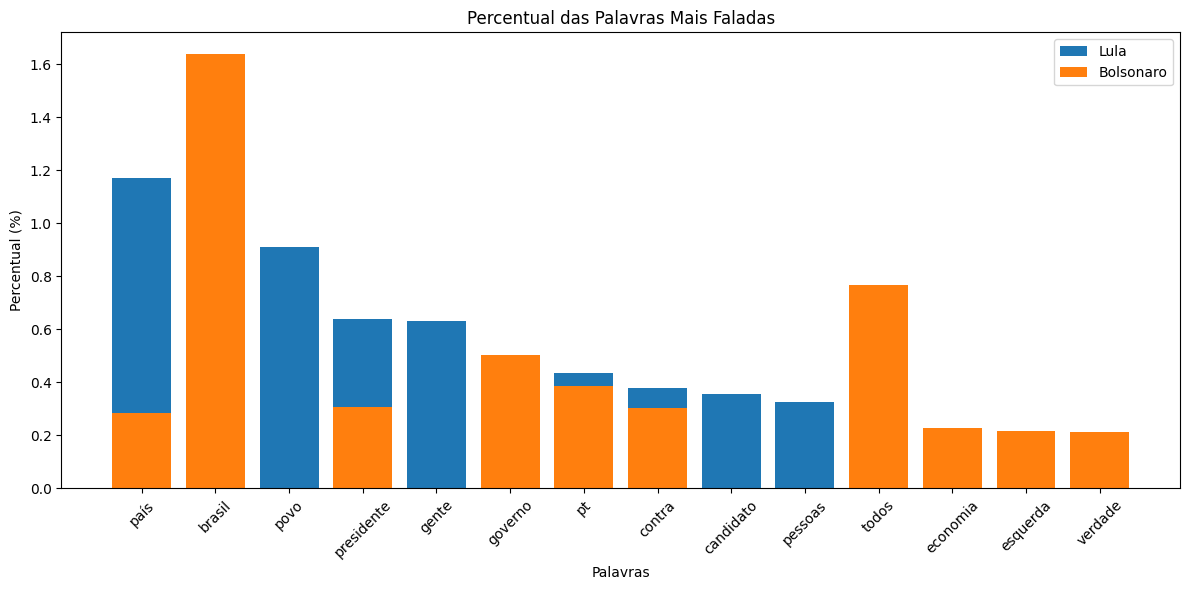

In [17]:
# Criar um DataFrame consolidado para processamento de texto
data_lula = df_lula.copy()
data_bolsonaro = df_bolsonaro.copy()

# Concatenar o texto de todos os tweets para Lula
all_text_lula = ' '.join(data_lula['full_text'])

# Concatenar o texto de todos os tweets para Bolsonaro
all_text_bolsonaro = ' '.join(data_bolsonaro['full_text'])

# Pré-processamento do texto
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    
    # Remover URLs (http e https)
    text = re.sub(r'http\S+', '', text)
    
    # Remover hashtags e palavras após #
    text = re.sub(r'#\w+', '', text)
    
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenização das palavras
    tokens = word_tokenize(text)
    
    # Remover stopwords e palavras específicas
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in ['boa', 'bolsonarosp', 'p', 'vivo', 'aqui', 'sempre', 'vamos','c', 'ter', 'anos', 'porque', 'grande', 'dia', 'jair', 'via','pra', 'haddad_fernando', 'fazer', 'vai', 'agora', 'sobre', 'obrigado', 'abraço', 'hoje', 'q', 'd','lula', 'bolsonaro', 'ricardo', 'stuckert', 'flavio', 'carlos', 'eduardo']]
    
    return filtered_tokens

# Aplicar o pré-processamento para cada tweet de Lula
preprocessed_tokens_lula = [preprocess_text(tweet) for tweet in data_lula['full_text']]

# Criar uma lista única de palavras de Lula
all_tokens_lula = [token for sublist in preprocessed_tokens_lula for token in sublist]

# Contagem de frequência das palavras para Lula
word_freq_lula = Counter(all_tokens_lula)

# Aplicar o pré-processamento para cada tweet de Bolsonaro
preprocessed_tokens_bolsonaro = [preprocess_text(tweet) for tweet in data_bolsonaro['full_text']]

# Criar uma lista única de palavras de Bolsonaro
all_tokens_bolsonaro = [token for sublist in preprocessed_tokens_bolsonaro for token in sublist]

# Contagem de frequência das palavras para Bolsonaro
word_freq_bolsonaro = Counter(all_tokens_bolsonaro)

# Calcular o total de palavras para Lula e Bolsonaro
total_words_lula = sum(word_freq_lula.values())
total_words_bolsonaro = sum(word_freq_bolsonaro.values())

# Calcular o percentual das palavras mais faladas para Lula
top_n = 10  # Número de palavras mais faladas que você deseja analisar
top_words_lula = word_freq_lula.most_common(top_n)
top_words_percentages_lula = [(word, freq / total_words_lula * 100) for word, freq in top_words_lula]

# Calcular o percentual das palavras mais faladas para Bolsonaro
top_words_bolsonaro = word_freq_bolsonaro.most_common(top_n)
top_words_percentages_bolsonaro = [(word, freq / total_words_bolsonaro * 100) for word, freq in top_words_bolsonaro]

# Preparar os dados para o gráfico
words_lula, percentages_lula = zip(*top_words_percentages_lula)
words_bolsonaro, percentages_bolsonaro = zip(*top_words_percentages_bolsonaro)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(words_lula, percentages_lula, label='Lula')
plt.bar(words_bolsonaro, percentages_bolsonaro, label='Bolsonaro')
plt.xlabel('Palavras')
plt.ylabel('Percentual (%)')
plt.title('Percentual das Palavras Mais Faladas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**NUVEM DE PALAVRAS**

> As nuvens de palavras são uma forma visualmente atraente de representar a frequência das palavras em um conjunto de texto. Elas são amplamente usadas para fornecer uma representação rápida e intuitiva das palavras mais frequentes em um texto ou conjunto de textos. 

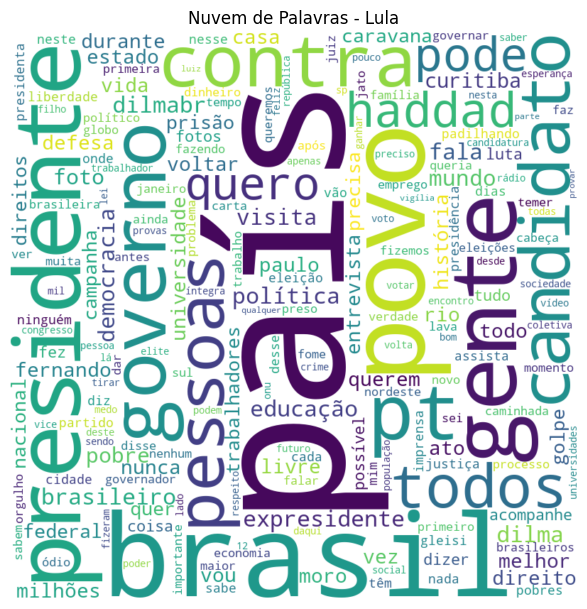

In [18]:
# Criar a nuvem de palavras para Lula
wordcloud_lula = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq_lula)

# Plotar as nuvens de palavras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_lula, interpolation='bilinear')
plt.title('Nuvem de Palavras - Lula')
plt.axis('off')

plt.tight_layout()
plt.show()


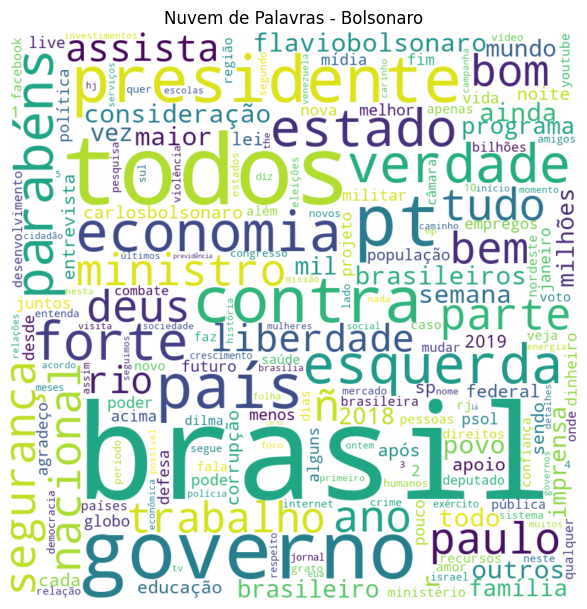

In [19]:
# Criar a nuvem de palavras para Bolsonaro
wordcloud_bolsonaro = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq_bolsonaro)

# Plotar as nuvens de palavras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bolsonaro, interpolation='bilinear')
plt.title('Nuvem de Palavras - Bolsonaro')
plt.axis('off')

plt.tight_layout()
plt.show()

**CONCLUSÃO**

> 1º Pela análise das 10 palavras mais faladas, percebe-se que o Lula aborda temas mais relacionados ao país, povo, pessoas, e isso também é possivel identificar na Nuvem de Palavras.

> 2º Já no caso do Bolsonaro, percebe-se que ele usa mais as palabras pt, governo, esquerda, contra, verdade, que isso pode indicar temas mais relacionados a oposição e ao antipetismo; e isso também é possivel identificar na Nuvem de Palavras.

_________________________________________________________________________________________________________________________________________________

### **ANALISE POR UMA DATA ESPECÍFICA (HISTÓRICA), VER O QUE FOI POSTADO NESSE PERÍODO**

> Vamos considerar o dia que o presidente Lula foi solto, como exemplo. Pois foi um dos twitters mais engajados.

In [20]:
#Especificando a data a ser filtrada
target_date = datetime(2019, 11, 8)

**LULA**

In [21]:
##Codigo para filtrar o twitter do LULA
lula_tweets_filtered = df_lula[df_lula['created_at'].dt.date == target_date.date()]
print("Tweets de Lula na data especificada:")
for tweet in lula_tweets_filtered['full_text']:
    print(tweet)

Tweets de Lula na data especificada:
Muito grato às palavras do companheiro. Quero que saiba que pode contar comigo no que for preciso para conduzir a Argentina em direção a resolver os problemas do povo pobre. Agradeço de coração a solidariedade que demonstrou me visitando na prisão. Deus abençoe o povo argentino! https://t.co/TmMfrQuOwG
#LulaLivreAmanhã 
https://t.co/9k4PiSl5zE
"Eu saio com muita vontade de voltar a lutar" https://t.co/7FpiXvjAWl
Liberdade! 

Foto: Ricardo Stuckert https://t.co/znpU1AcHIR
8 de novembro de 2019, 580 dias de luta e resistência.

Foto: Ricardo Stuckert https://t.co/pAuSdPR0gt
AO VIVO | Lula está de volta; assista
https://t.co/h8qAdflOOB
🚨 AO VIVO: Gleisi Hoffmann relata conversa com o ex-presidente Lula #LulaLivreJá
https://t.co/8pBH70mPMe
AO VIVO: Coletiva de imprensa com os advogados de Lula #LulaLivreJá
https://t.co/3LfIN95tiG
Lula Livre https://t.co/EJRrynjJjE
Thank you for your solidarity, you have always been my candidate for the US presidency and

**BOLSONARO**

In [22]:
bolsonaro_tweets_filtered = df_bolsonaro[df_bolsonaro['created_at'].dt.date == target_date.date()]
print("\nTweets de Bolsonaro na data especificada:")
for tweet in bolsonaro_tweets_filtered['full_text']:
    print(tweet)


Tweets de Bolsonaro na data especificada:
Ideia do @mdregional_br, Gustavo Canuto – é utilizar energia de placas solares para bombear água do ‘Velho Chico’ até os reservatórios do “Projeto São Francisco” – podendo reduzir o custo da operação em até 25% para Pernambuco, Ceará, Paraíba e Rio Grande do Norte. https://t.co/L1oynZvcJZ
Redução de custo na aquisição de frota de no mínimo 40%. Passo enorme para quem quer investir no setor, gerar empregos, movimentar toda a cadeia produtiva e ampliar a participação da cabotagem de transportes do Brasil. Vem mais novidades aí! @portosdobrasil @tarcisiogdf
- Assista ao importante discurso:
- Formatura de 500 Policiais Federais em Sobradinho/DF
- *PR JAIR BOLSONARO*. https://t.co/Lhb6RKP6qa
https://t.co/xX3Mx1jSq6
Fui eleito para chefiar um dos Poderes da República e assim o farei enquanto Deus permitir. Pela manhã estarei na formatura de novos 500 policiais federais. À tarde em Goiás na entrega de ônibus escolares e agenda com o Governador Caiad

> Vamos considerar o dia que o Bolsonaro foi eleito, como exemplo. Pois foi um dos twitters mais engajados.

In [23]:
#Especificando a data a ser filtrada
target_date = datetime(2018, 10, 29)

**LULA**

In [24]:
##Codigo para filtrar o twitter do LULA
lula_tweets_filtered = df_lula[df_lula['created_at'].dt.date == target_date.date()]
print("Tweets de Lula na data especificada:")
for tweet in lula_tweets_filtered['full_text']:
    print(tweet)

Tweets de Lula na data especificada:


**BOLSONARO**

In [25]:
bolsonaro_tweets_filtered = df_bolsonaro[df_bolsonaro['created_at'].dt.date == target_date.date()]
print("\nTweets de Bolsonaro na data especificada:")
for tweet in bolsonaro_tweets_filtered['full_text']:
    print(tweet)


Tweets de Bolsonaro na data especificada:
Recebemos há pouco ligação do Presidente dos EUA, @realDonaldTrump nos parabenizando por esta eleição histórica! Manifestamos o desejo de aproximar ainda mais estas duas grande nações e avançarmos no caminho da liberdade e da prosperidade!
Senhor Fernando Haddad, obrigado pelas palavras! Realmente o Brasil merece o melhor. https://t.co/OmgUMuasX4
Thank you President Putin! https://t.co/E55LTGw38t
Gracias Presidente Sánchez! https://t.co/8zRxIWX05W
Valeu @lobaoeletrico ! 🎸👍🏻
🇧🇷🇨🇴 https://t.co/EWmLwL1Uxb
I’ve just received incredible words from the Prime Minister of Israel, Benjamin Netanyahu as well as from ambassador Yossi Shelley. Our friendship ties will undoubtedly result in mutual agreements that will surely benefit both of our nations and citizens. 🇧🇷🇮🇱
Acabo de receber os cumprimentos do Primeiro Ministro de Israel, Benjamin Netanyahu, ao lado do Embaixador Yossi Shelley. Nossos laços de amizade se traduzirão em acordos onde nossos povos